# Parte 1: Numpy

In [10]:
import numpy as np

## 1) ¿Cuál es el tamaño en bytes de un array de 1000 elementos de tipo booleano?

In [20]:
boolean_array = np.full((1000), True) # Creo un array con shape (1, 1000) elemetos llenos de "True"
boolean_array.nbytes # Veo cuantos bytes tiene

1000

## 2) Cree un array cuyos elementos sean los enteros pares en [1,100] y en orden decreciente. Muestre los 10 últimos por pantalla.

In [25]:
pares_1__1000 =  np.array([i*2 for i in range(501)])
pares_1__1000
pares_1000__1 = pares_1__1000[::-1]
print("Los Ultimos 10:", pares_1000__1[-10:])

Los Ultimos 10: [18 16 14 12 10  8  6  4  2  0]


## 3) Dado el array

In [27]:
array_4x4 = np.array([[2,4,5,6,],[0,3,7,4],[8,8,5,2],[1,5,6,1]])
print(array_4x4)

[[2 4 5 6]
 [0 3 7 4]
 [8 8 5 2]
 [1 5 6 1]]


### Seleccione con una instrucción el subarray de elementos 0374

In [29]:
sub_array_1 = array_4x4[1]
print(sub_array_1)

[0 3 7 4]


### Después, seleccione el subarray de elementos
### 2 5 
### 8 5

In [79]:
sub_array_2 = array_4x4[0:3:2,0:3:2]
print(sub_array_2)

[[2 5]
 [8 5]]


## 4) Dados los arrays a = [1, 4, 2, 7] y b = [1, 3, 2, 9], obtenga la media aritmética de la diferencia (a-b).

In [80]:
a = np.array([1, 4, 2, 7])
b = np.array([1, 3, 2, 9])

print((a-b).mean())

-0.25


## 5) Tengo valores de cordenadas (x, y) en las columnas del array


### `1.33  4.5`
### `30.0  10.7`
### `70.2  0.5`
### Agregue a este array las coordenadas (37.1, -3.6).
### Muestre en pantalla las dimensiones del nuevo array.

In [113]:
coordenadas = np.array([[1.33, 4.5],[30.0, 10.7], [70.2, 0.5]])

print(coordenadas.shape)

(4, 2)


## 6) Copie el array del ejercicio anterior. Traspóngalo (. Agregue ahora dos nuevos pares de coordenadas: (10.8, 3.0) y (35.8, 12.0).

In [131]:
coordenadas = np.array([[1.33, 4.5],[30.0, 10.7], [70.2, 0.5]]) 

coordenadas_trans = coordenadas.reshape(coordenadas.shape[1], coordenadas.shape[0])
coordenadas_trans = np.insert(coordenadas_trans, coordenadas_trans.shape[1], [[10.8, 3.0],[35.8, 12.0]], axis = 1)

In [135]:
print("Shape:",coordenadas_trans.shape)
print(coordenadas_trans)

Shape: (2, 5)
[[ 1.33  4.5  30.   10.8  35.8 ]
 [10.7  70.2   0.5   3.   12.  ]]


# Parte 2: Exploración y Minería de Datos:

In [57]:
import pandas as pd
import matplotlib.pyplot as plt

In [58]:
dataset = pd.read_csv('NucleosPoblacion.csv')
dataset.head()

,FID,OBJECTID,Texto,Poblacion,CodMun,Municipio,CodProvin,Provincia,X,Y
0,0,1,Agüimes,29431.0,35002,Agüimes,35,Las Palmas,-15.446012,27.900542
1,1,2,Antigua,10458.0,35003,Antigua,35,Las Palmas,-14.013301,28.418966
2,2,3,Arrecife,58156.0,35004,Arrecife,35,Las Palmas,-13.551451,28.960649
3,3,4,Arucas,36745.0,35006,Arucas,35,Las Palmas,-15.521512,28.117496
4,4,5,Gáldar,24473.0,35009,Gáldar,35,Las Palmas,-15.654111,28.143873


## 1) ¿Cuántos Municipios tienen más de 100000 habitantes?

In [5]:
dataset[dataset['Poblacion'] > 100000]['Municipio'].count()

62

## 2) Realice una gráfica de barras sobre la polbación de cada ciudad, ordenela de menor a mayo y responda:

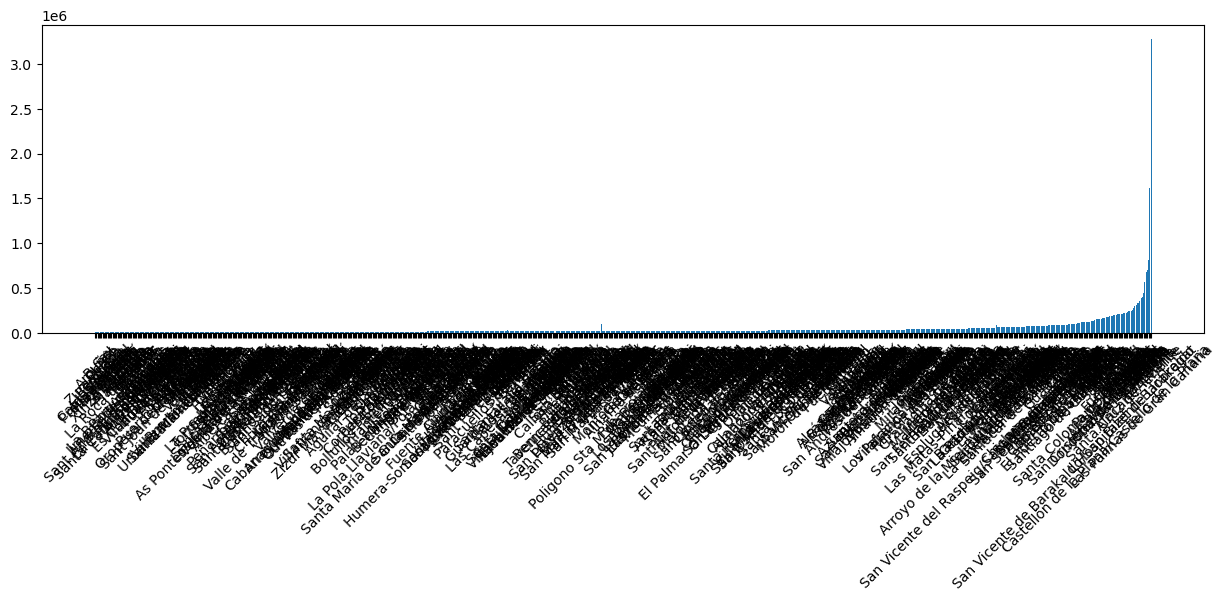

In [6]:
plt.figure(figsize = (15, 4))
plt.bar(dataset.sort_values('Poblacion')['Texto'], dataset.sort_values('Poblacion')['Poblacion'])
plt.xticks(rotation = 45)
plt.show()

### a. ¿Cuál es la segunda ciudad más poblada?

In [7]:
dataset.sort_values('Poblacion', ascending = False).head(1)

,FID,OBJECTID,Texto,Poblacion,CodMun,Municipio,CodProvin,Provincia,X,Y
355,355,356,Madrid,3273049.0,28079,Madrid,28,Madrid,-3.703797,40.41663


### b. ¿Qué posición ocupa Granada en el ranking de las ciudades más pobladas?

In [20]:
dataset_sort_poblacion_asc = dataset.sort_values('Poblacion') # Creo un nuevo dataset con los valores ordenados por poblacion
dataset_sort_poblacion_asc.index = range(dataset.shape[0]) # Reinicio los index
dataset_sort_poblacion_asc.index + 1 # Aumento en 1 los index para que empieze en 1 en ves de 0
print('Granada se encuentra en la posicion:', dataset_sort_poblacion_asc[dataset_sort_poblacion_asc['Texto'] == 'Granada'].index[0] )

Granada se encuentra en la posicion: 834


## 3) ¿Cuántos municipios de Extremadura tienen más de 5000 habitantes?

1. Buscar que es Extremadura
2. Descubrir que es un estado Autonomo
3. Descubrir que un estado autonomo tiene provincias
4. Descubrir que son Cáceres y Badajoz

In [3]:
provincias = (dataset['Provincia'] == 'Cáceres')  | (dataset['Provincia'] == 'Badajoz')
poblacion = dataset['Poblacion'] > 5000
print(f"Hay {dataset[provincias & poblacion]['FID'].count()} Municipios en Extremadura con mas de 5000 habitantes")

Hay 14 Municipios en Extremadura con mas de 5000 habitantes


## 4)  ¿Cuál es el municipio situado más al Norte? (Usar el valor de la coordenada "Y" que representa la latitud en grados). Proporcione también la provincia a la que pertenece y su población.

In [42]:
dataset[dataset['Y'] == dataset['Y'].max()][['Municipio', 'Provincia', 'Poblacion', 'Y']]

,Municipio,Provincia,Poblacion,Y
104,Viveiro,Lugo,16211.0,43.625578


## 5) Obtenga la media, mediana, desviación estándar, valor máximo y valor mínimo de la población de los municipios de la provincia de Granada.

In [47]:
print('Poblacion Media:\t\t', dataset['Poblacion'].mean())
print('Poblacion Mediana:\t\t', dataset['Poblacion'].median())
print('Poblacion Desviacion Estandar:\t', dataset['Poblacion'].std())
print('Poblacion Valor Maximo:\t\t', dataset['Poblacion'].max())
print('Poblacion Valor Minimo:\t\t', dataset['Poblacion'].min())

Poblacion Media:		 45710.85680751174
Poblacion Mediana:		 19865.0
Poblacion Desviacion Estandar:	 140598.14339650268
Poblacion Valor Maximo:		 3273049.0
Poblacion Valor Minimo:		 10037.0


## 6) Realice un histograma con la población de los Municipios para cada una de las provincias.

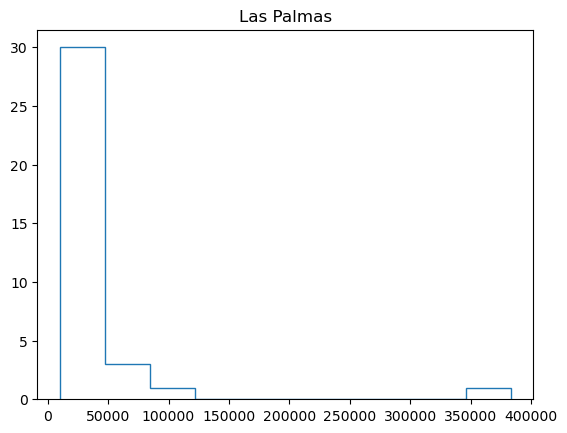

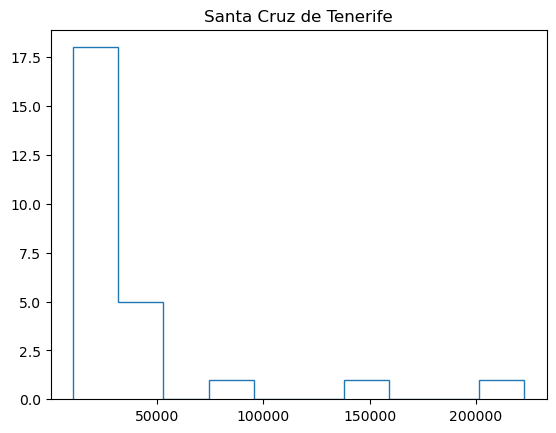

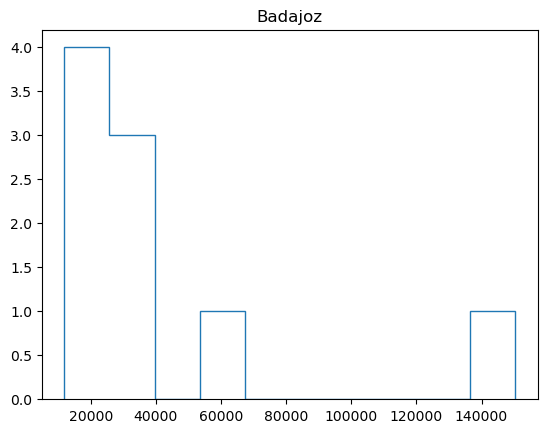

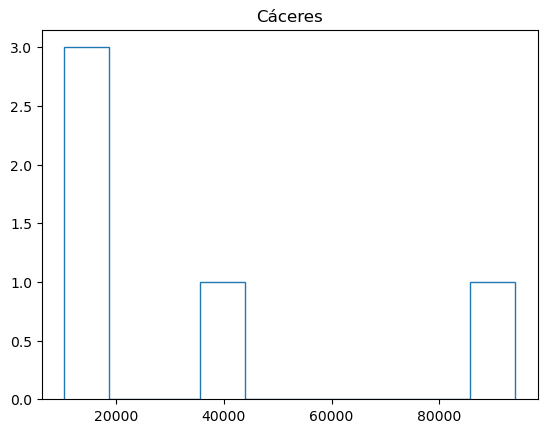

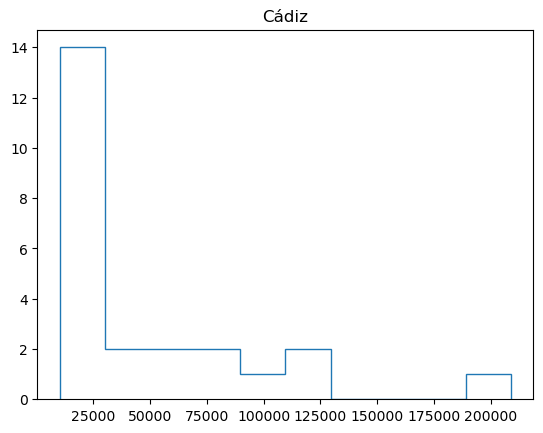

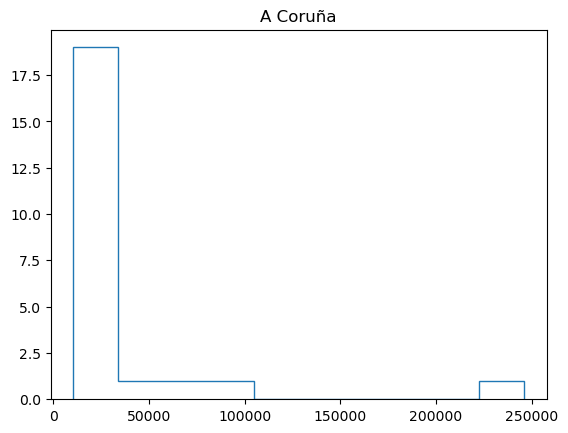

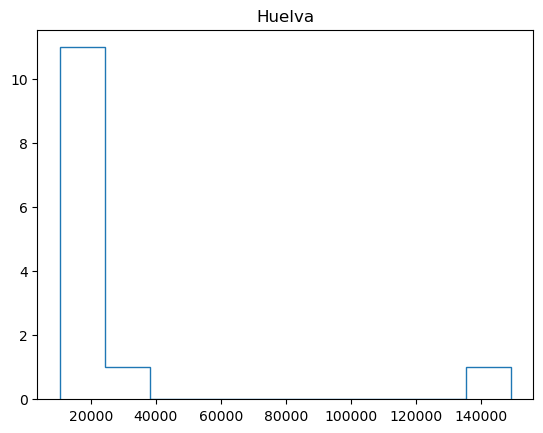

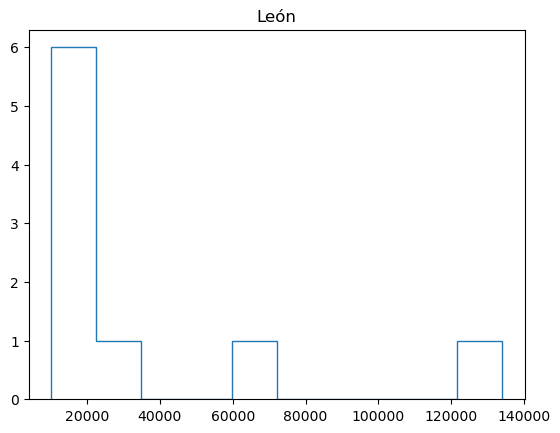

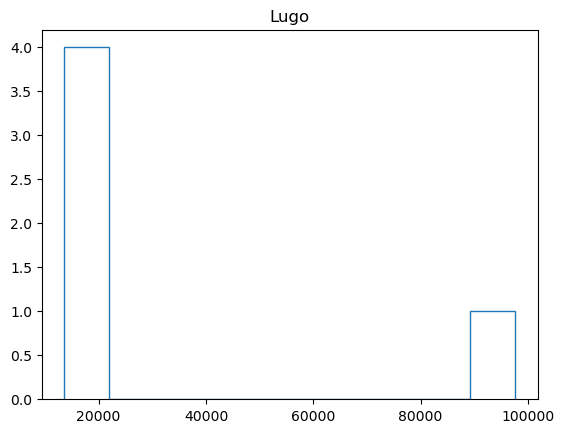

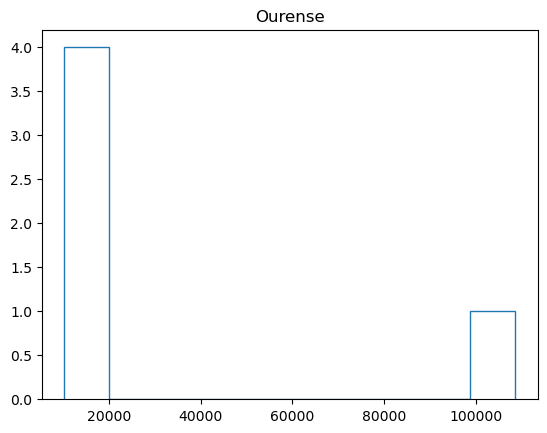

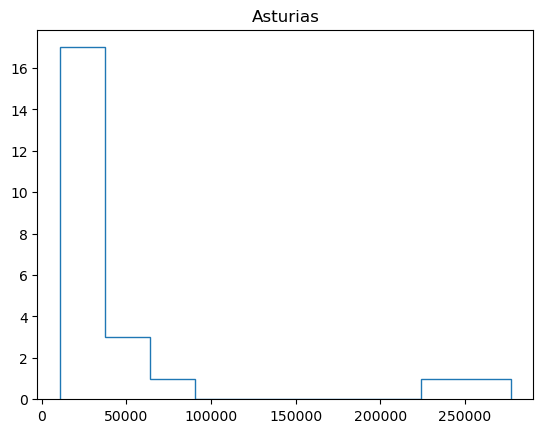

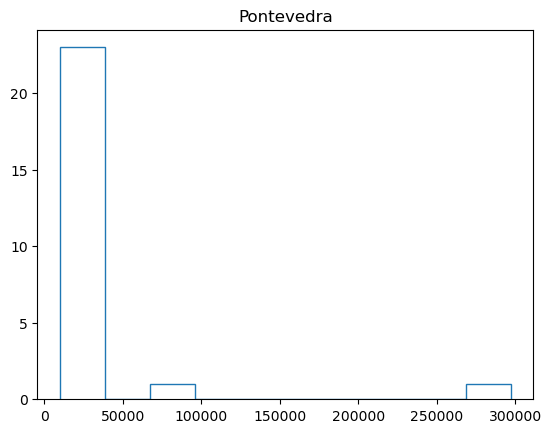

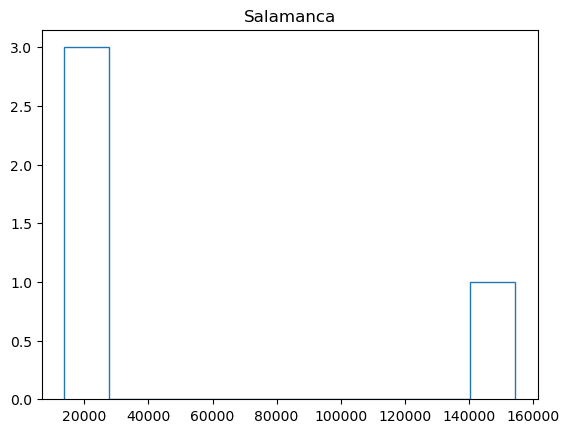

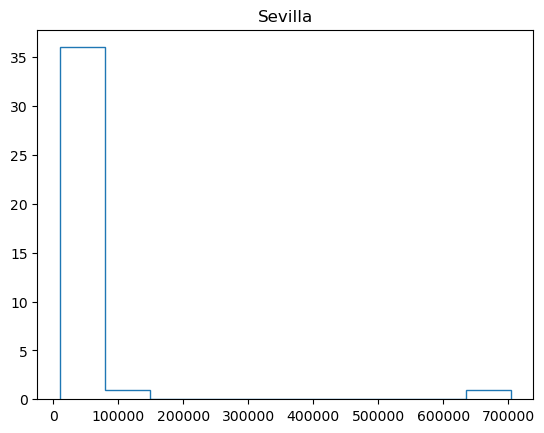

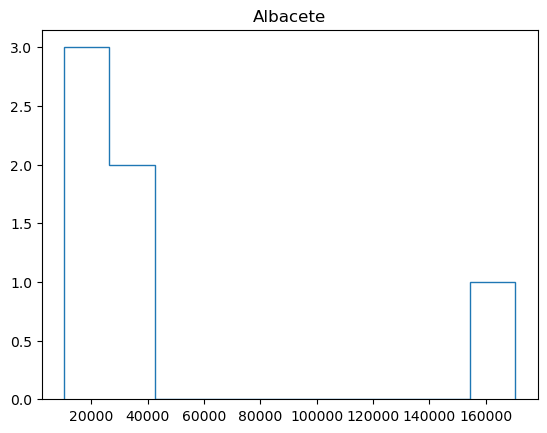

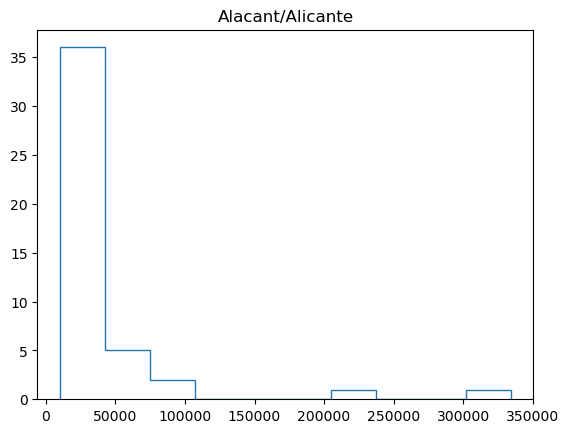

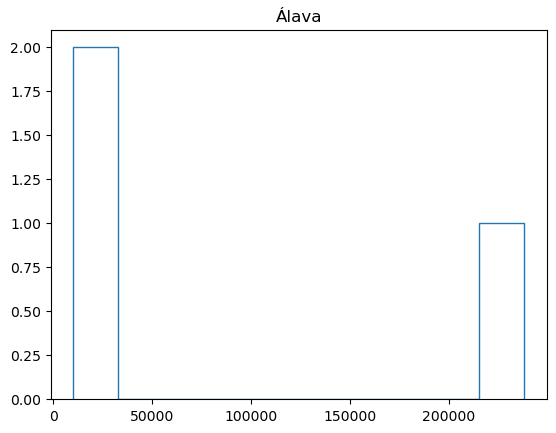

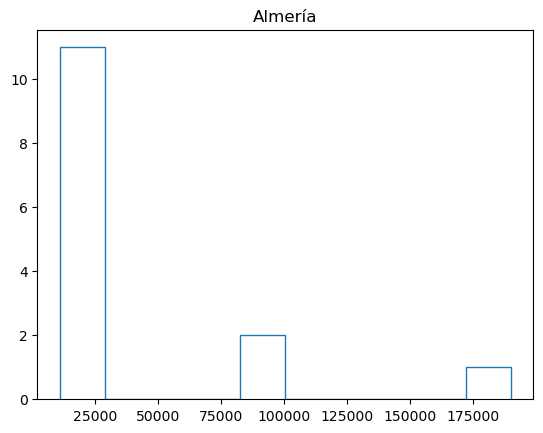

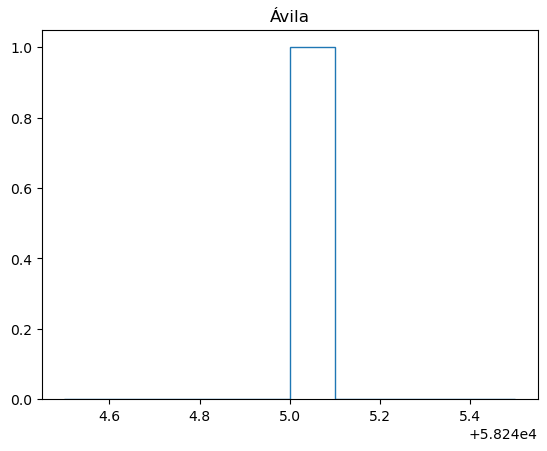

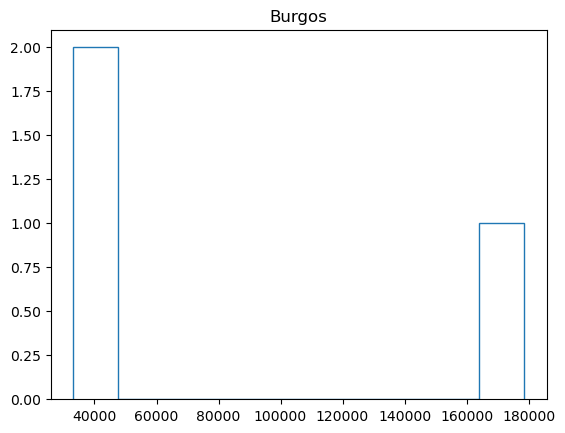

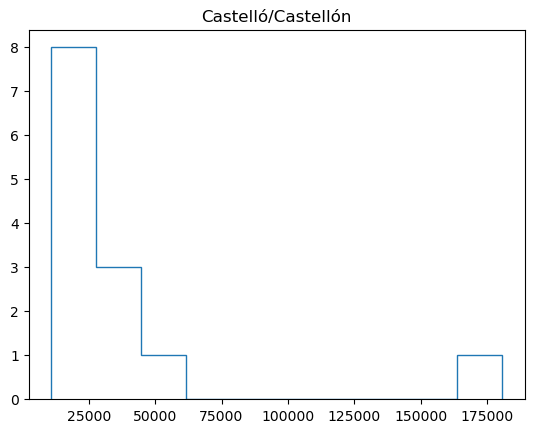

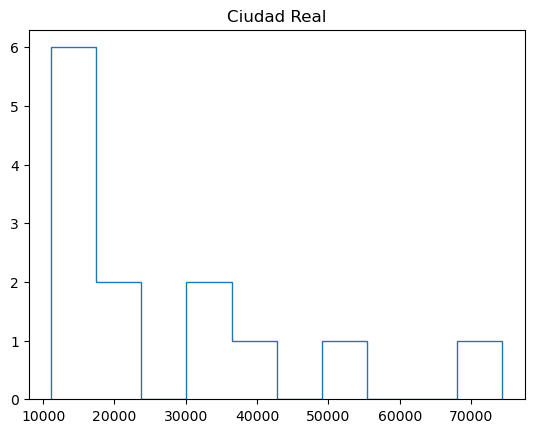

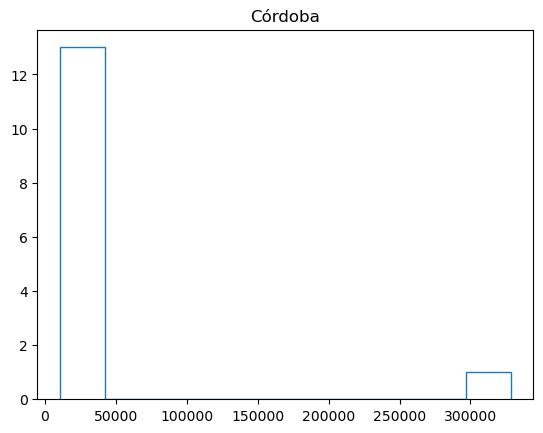

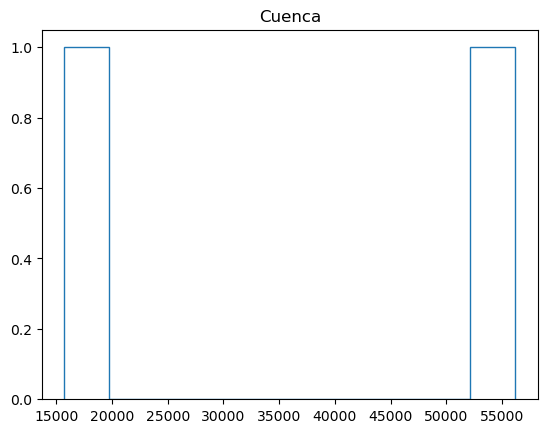

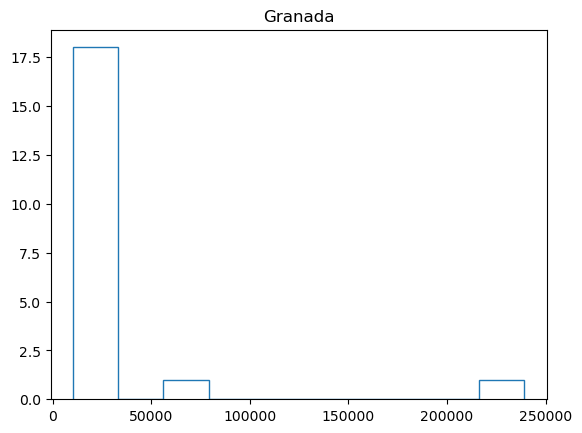

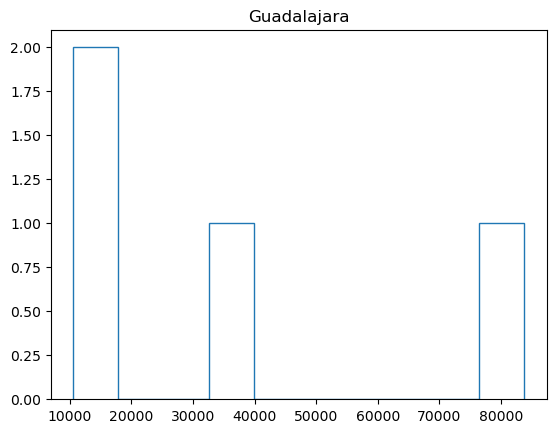

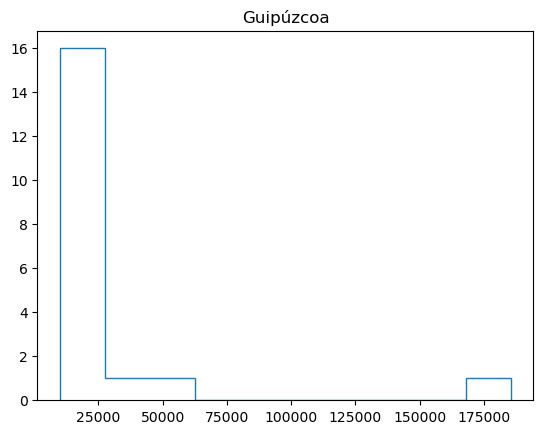

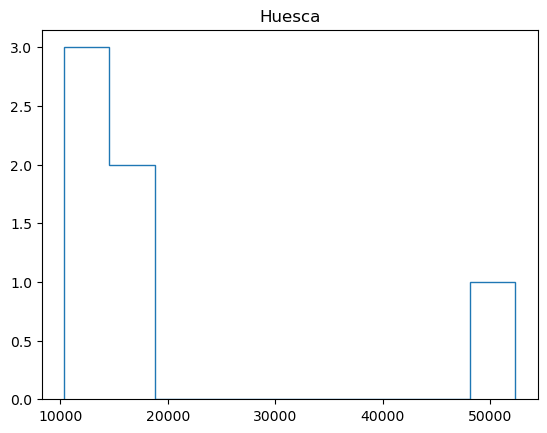

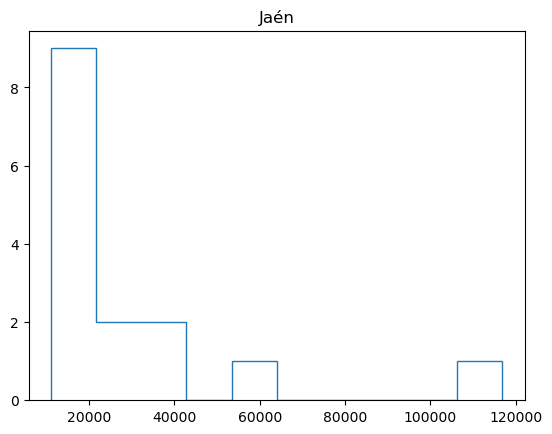

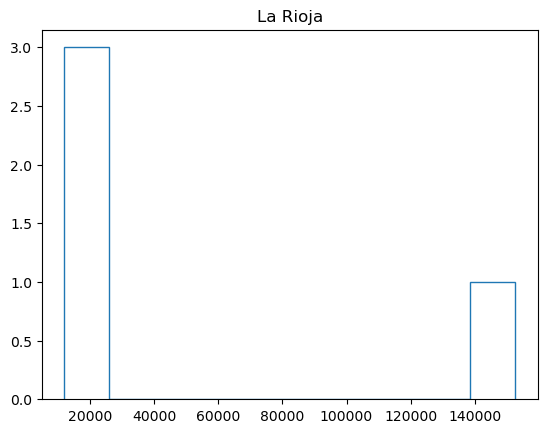

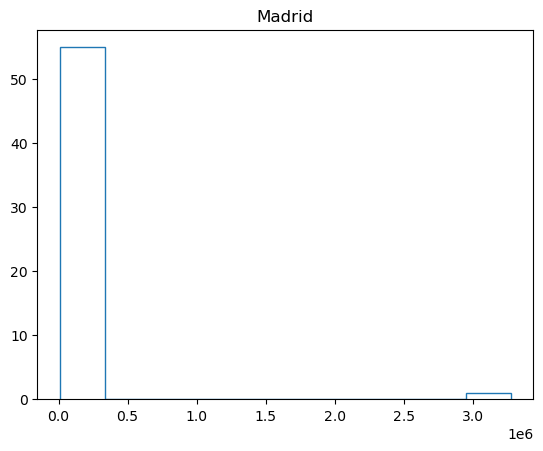

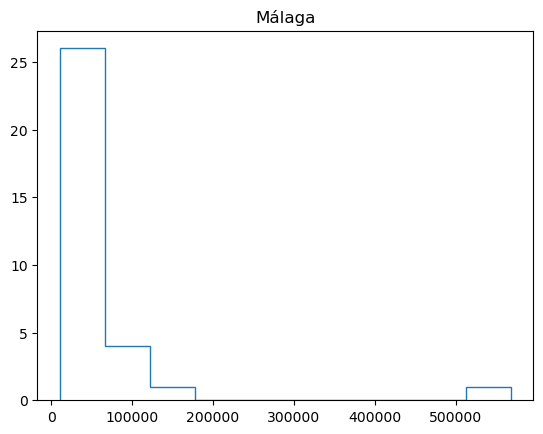

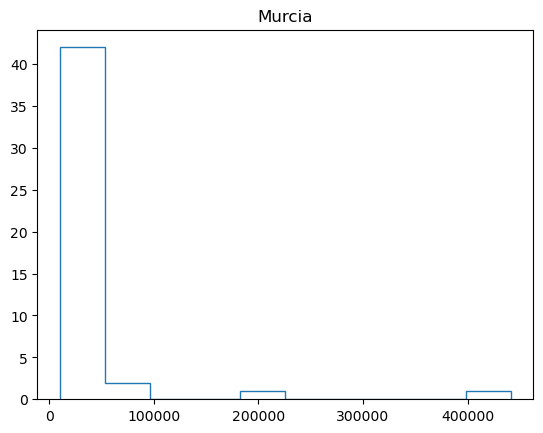

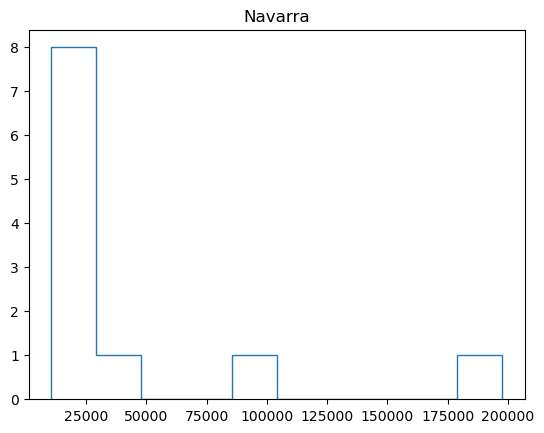

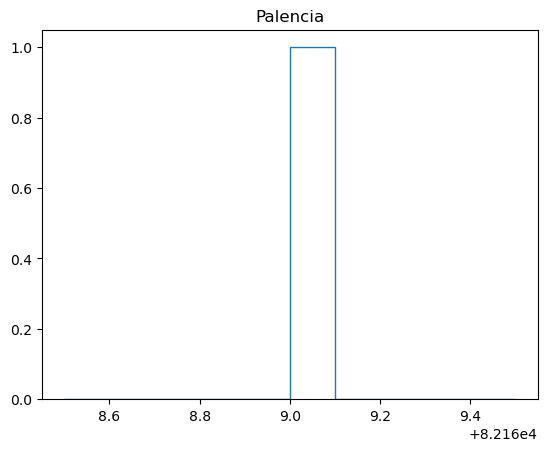

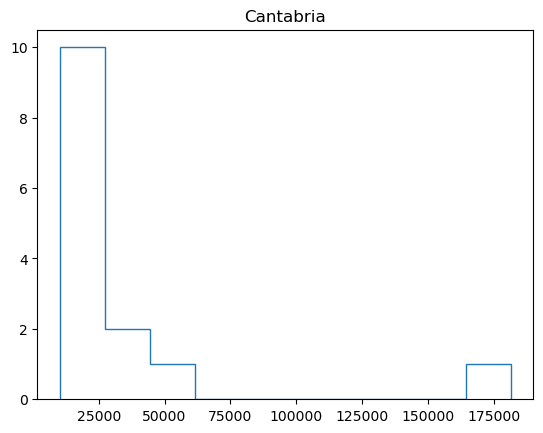

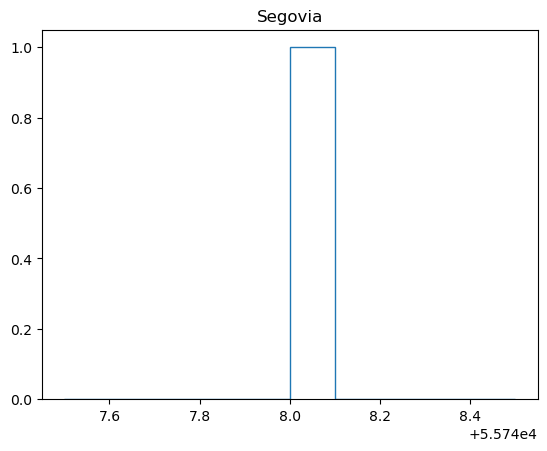

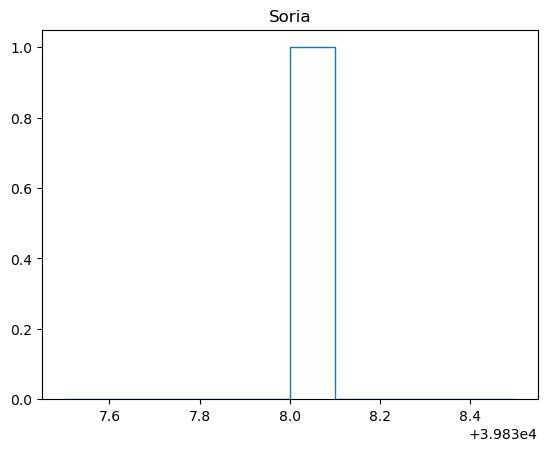

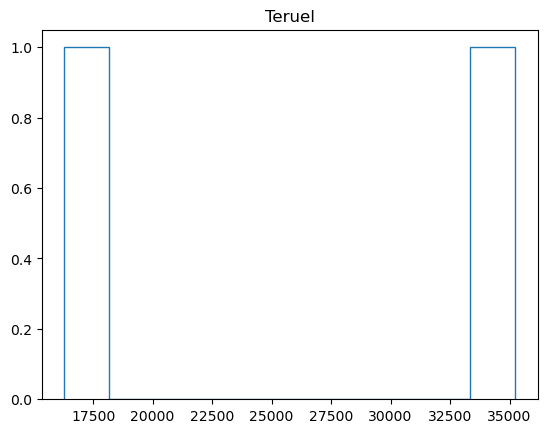

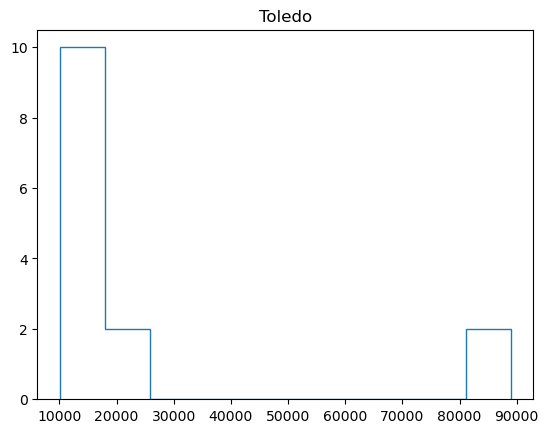

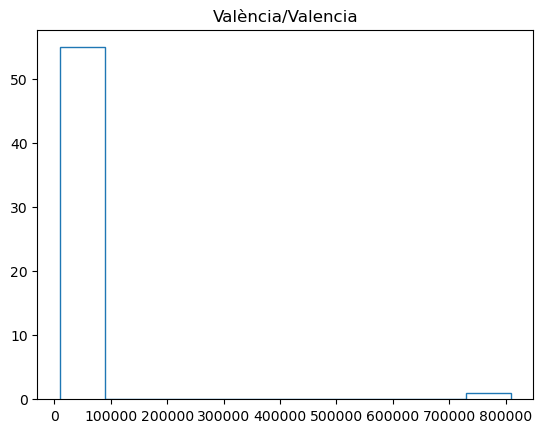

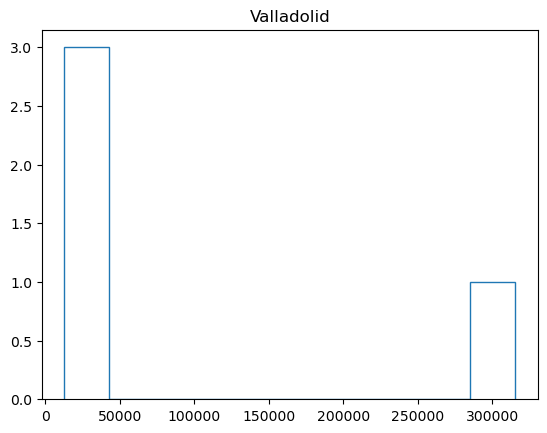

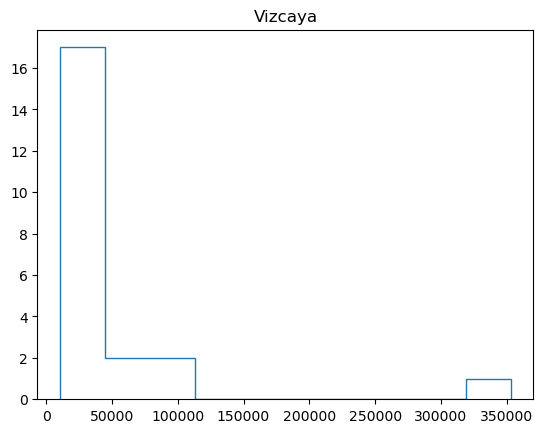

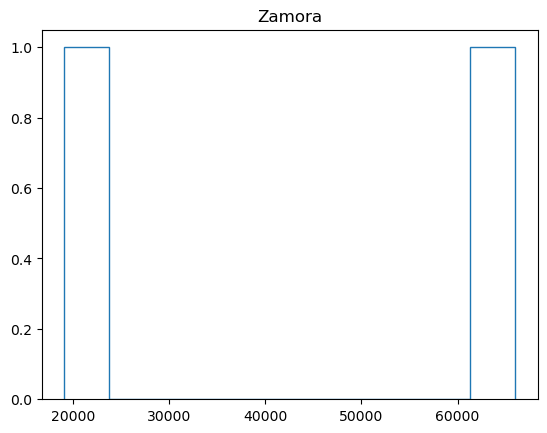

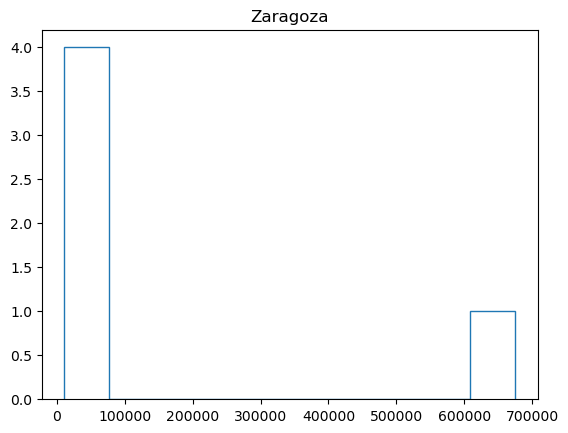

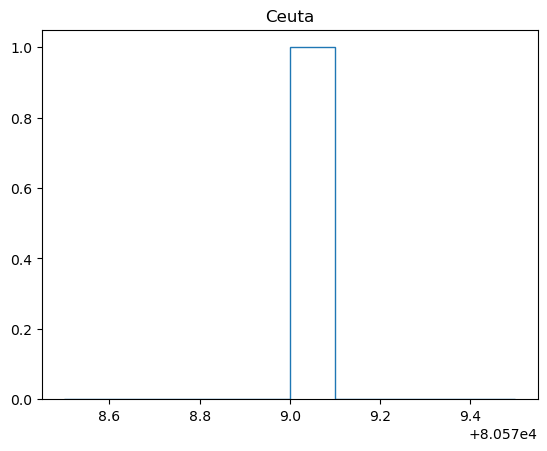

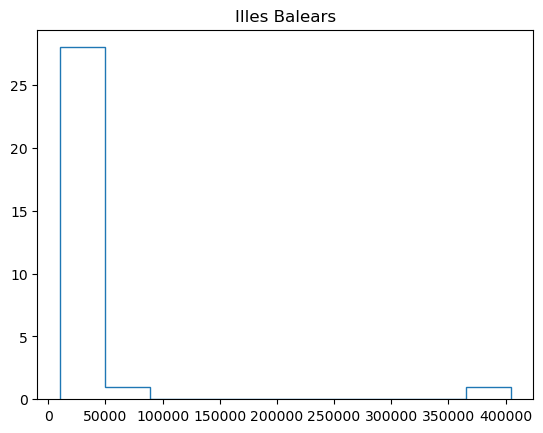

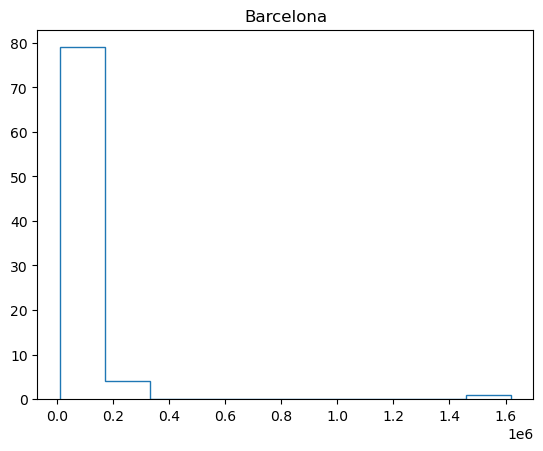

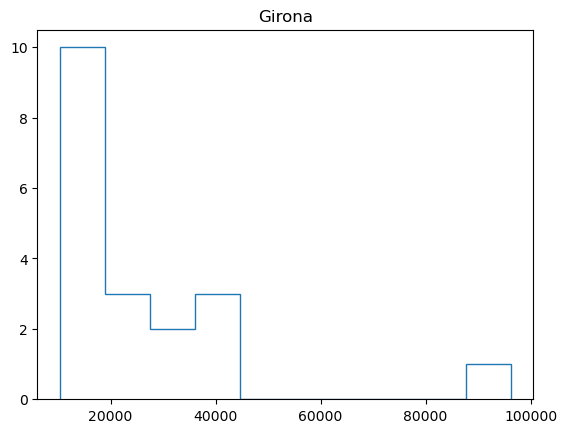

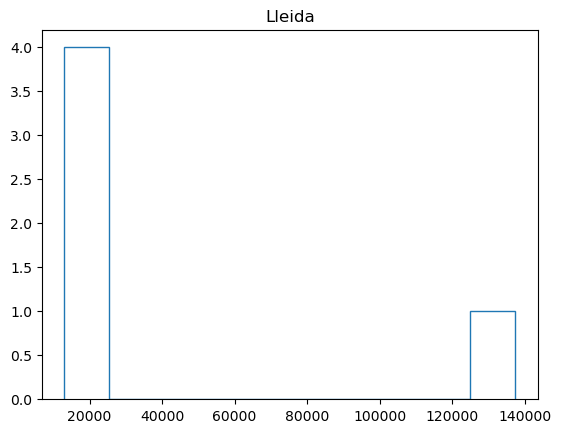

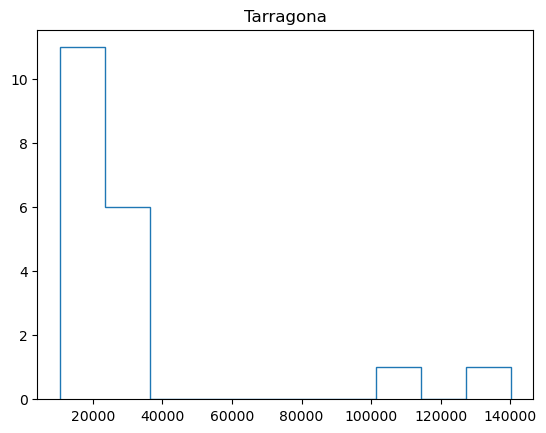

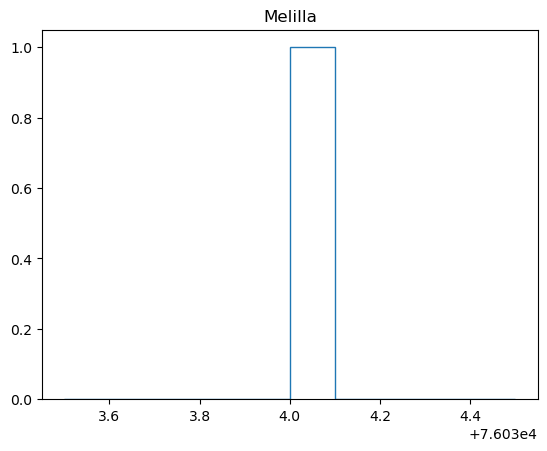

In [73]:
for provincia in dataset['Provincia'].unique():
    counts, bins = np.histogram(dataset[dataset['Provincia'] == provincia]['Poblacion'])
    plt.stairs(counts, bins)
    plt.title(provincia)
    plt.show()

In [63]:
dataset['Municipio'].count()

852

## 7) Seleccione al azar cincuenta municipios diferentes de entre los diponibles en el archivo. Asegúrese de que no se repitan. ¿Luego calcule el promedio de la población y la desviación estándar de esto 50 municipios?.

In [5]:
import random

In [15]:
municipios = list(dataset['FID']) # Creo una lista con todos los municipios por su FDI
municipio_FID = [] # Creo una lista vacia
for i in range(50):
    municipio_FID.append(municipios.pop(random.randint(0, len(municipios)))) # Agrego a la lista vacia por medio de pop asi se evita elegir el mismo

pob_mun_50_rand = []
for x in municipio_FID:
    pob_mun_50_rand.append(dataset[dataset['FID'] == x]['Poblacion'].values[0])
pob_mun_50_rand = np.array(pob_mun_50_rand)
print('Media:\t\t\t', pob_mun_50_rand.mean())
print('Desviacion Estandar:\t', pob_mun_50_rand.std())

Media:			 34951.56
Desviacion Estandar:	 39450.126774021905


## 8) Determine los nombres de los Municipios más cercano y más lejano a Madrid. Para ello debe calcular la distancia en todos ellos y Madrid. No considere a Madrid en el análisis ya que la distancia sería cero.

In [117]:
pd.options.mode.copy_on_write = True # Evitar enviar un view
madrid_x_y = list(dataset[dataset['Municipio'] == 'Madrid'][['X', 'Y']].values[:][0]) # Obtengo los datos X y Y de Madrid
dataset_dist_madrid = dataset[['FID', 'Municipio', 'X', 'Y']] # Obtengo los datos necesarios
dataset_dist_madrid = dataset_dist_madrid.drop((dataset_dist_madrid[(dataset_dist_madrid['Municipio'] == 'Madrid')]).index) # Eliminamos Madrid

# Agrego la columna Hipotenusa para tener el cuadrado de la suma de las diferencias entre Madrid y el Municipio
dataset_dist_madrid['Hipotenusa'] = (dataset_dist_madrid['X'] - madrid_x_y[0])**2 + (dataset_dist_madrid['Y'] - madrid_x_y[1])**2 

In [118]:
# Agrego la columna Hipotenusa para tener el cuadrado de la suma de las diferencias entre Madrid y el Municipio
dataset_dist_madrid['Hipotenusa'] = (dataset_dist_madrid['X'] - madrid_x_y[0])**2 + (dataset_dist_madrid['Y'] - madrid_x_y[1])**2 
# Describo la columna Hipotenusa
des_hipo = dataset_dist_madrid['Hipotenusa'].describe()
des_hipo

count    851.000000
mean      36.362626
std       71.723594
min        0.006556
25%        9.501630
50%       14.046048
75%       29.479108
max      340.190500
Name: Hipotenusa, dtype: float64

In [119]:
cercano_municipio_madrid = dataset_dist_madrid[dataset_dist_madrid['Hipotenusa'] == des_hipo['min']]
lejano_municipio_madrid = dataset_dist_madrid[dataset_dist_madrid['Hipotenusa'] == des_hipo['max']]
print(f"El Municipio mas cercano a Madrid es {cercano_municipio_madrid['Municipio'].values[0]}")
print(f"El Municipio mas lejano a Madrid es {lejano_municipio_madrid['Municipio'].values[0]}")

El Municipio mas cercano a Madrid es Pozuelo de Alarcón
El Municipio mas lejano a Madrid es Los Llanos de Aridane
